<a href="https://www.kaggle.com/code/yassaabram/classification-with-an-academic-success?scriptVersionId=225788474" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Import LIB

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from tensorflow.keras.models import Sequential ,Model
from tensorflow.keras.layers import Input, Dense, Dropout ,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint ,CSVLogger,EarlyStopping,ReduceLROnPlateau,LearningRateScheduler
from tensorflow.keras.metrics import Precision, Recall, F1Score, AUC

### Read data

In [2]:
df=pd.read_csv("/kaggle/input/playground-series-s4e6/train.csv")
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [4]:
df.drop(columns=["id"],inplace=True)

In [5]:
df.duplicated().sum()

0

### Prepossessing

In [6]:
x=df.drop(columns=['Target'])
y=df['Target']

In [7]:
x.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,0,6,7,6,12.428571,0,11.1,0.6,2.02
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,0,6,9,0,0.000000,0,11.1,0.6,2.02
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,0,8,11,7,12.820000,0,11.1,0.6,2.02
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,0,7,12,6,12.933333,0,7.6,2.6,0.32


In [8]:
#encoder=LabelEncoder()
#y=encoder.fit_transform(y)

In [9]:
encoderr=OneHotEncoder(sparse_output=False)
y=encoderr.fit_transform(y.values.reshape(-1,1))

In [10]:
y

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

### Scaling data

In [11]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

### Split data

In [12]:
x_train,x_dammy,y_train,y_dammy =train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [13]:
x_valid,x_test,y_valid,y_test=train_test_split(x_dammy,y_dammy,test_size=0.5,random_state=42,stratify=y_dammy)

### Model Sequential


In [14]:
model=Sequential([ Dense(512,activation='relu',input_dim=(x_train.shape[1])),
    Dropout(0.1),
    Dense(256,activation='relu'),
    Dense(128,activation='relu'),
    Dense(3,activation="softmax")              
])
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', Precision()]
)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │          18,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,555 (717.01 KB)

 Trainable params: 183,555 (717.01 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
x_train.shape[1]

36

#### functional_2

In [16]:
inp=Input((x_train.shape[1],))
d1=Dense(512,activation='relu')(inp)
dr=Dropout(0.1)(d1)
d2=Dense(256,activation='relu')(dr)
d3=Dense(128,activation='relu')(d2)
out=Dense(3,activation="softmax")(d3)
model=Model([inp],[out])

In [17]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 36)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │          18,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,555 (717.01 KB)

 Trainable params: 183,555 (717.01 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy',Precision()])

In [19]:
modelcheckpoints=ModelCheckpoint('model.weights.keras',monitor='val_loss',save_best_only=True,save_weights_only=False)
earlyStopping=EarlyStopping(monitor='val_loss',patience=7,restore_best_weights=True)
logger=CSVLogger('model.csv')

In [20]:
hist=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),epochs=20,batch_size=32,callbacks=[modelcheckpoints,earlyStopping,logger]) 

Epoch 1/20
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7897 - loss: 0.5469 - precision_1: 0.8317 - val_accuracy: 0.8063 - val_loss: 0.4992 - val_precision_1: 0.8471
Epoch 2/20
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8091 - loss: 0.4938 - precision_1: 0.8374 - val_accuracy: 0.8061 - val_loss: 0.4977 - val_precision_1: 0.8455
Epoch 3/20
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8097 - loss: 0.5016 - precision_1: 0.8403 - val_accuracy: 0.8031 - val_loss: 0.5473 - val_precision_1: 0.8112
Epoch 4/20
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8111 - loss: 0.4972 - precision_1: 0.8304 - val_accuracy: 0.8062 - val_loss: 0.4894 - val_precision_1: 0.8432
Epoch 5/20
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8164 - loss: 0.4819 - precision_1: 0.8395 - val_accuracy: 0.8082 - val_loss: 0.5050 - val_precision_1: 0.8242
Epoch 6/20
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8166 - loss: 0.4864 - precision_1: 0.8341

In [21]:
hist.history['accuracy']

[0.8011892437934875,
 0.8075113296508789,
 0.8116607069969177,
 0.8117587566375732,
 0.8133596777915955,
 0.8124448657035828,
 0.806106448173523,
 0.8067435622215271,
 0.8062861561775208,
 0.8050609230995178,
 0.8100107908248901]

In [22]:
hist.history['val_accuracy']

[0.8063251376152039,
 0.8060637712478638,
 0.8030580282211304,
 0.8061944842338562,
 0.8081547021865845,
 0.8093308806419373,
 0.8060637712478638,
 0.7935180068016052,
 0.8041034936904907,
 0.8052796721458435,
 0.8115525245666504]

<function matplotlib.pyplot.show(close=None, block=None)>

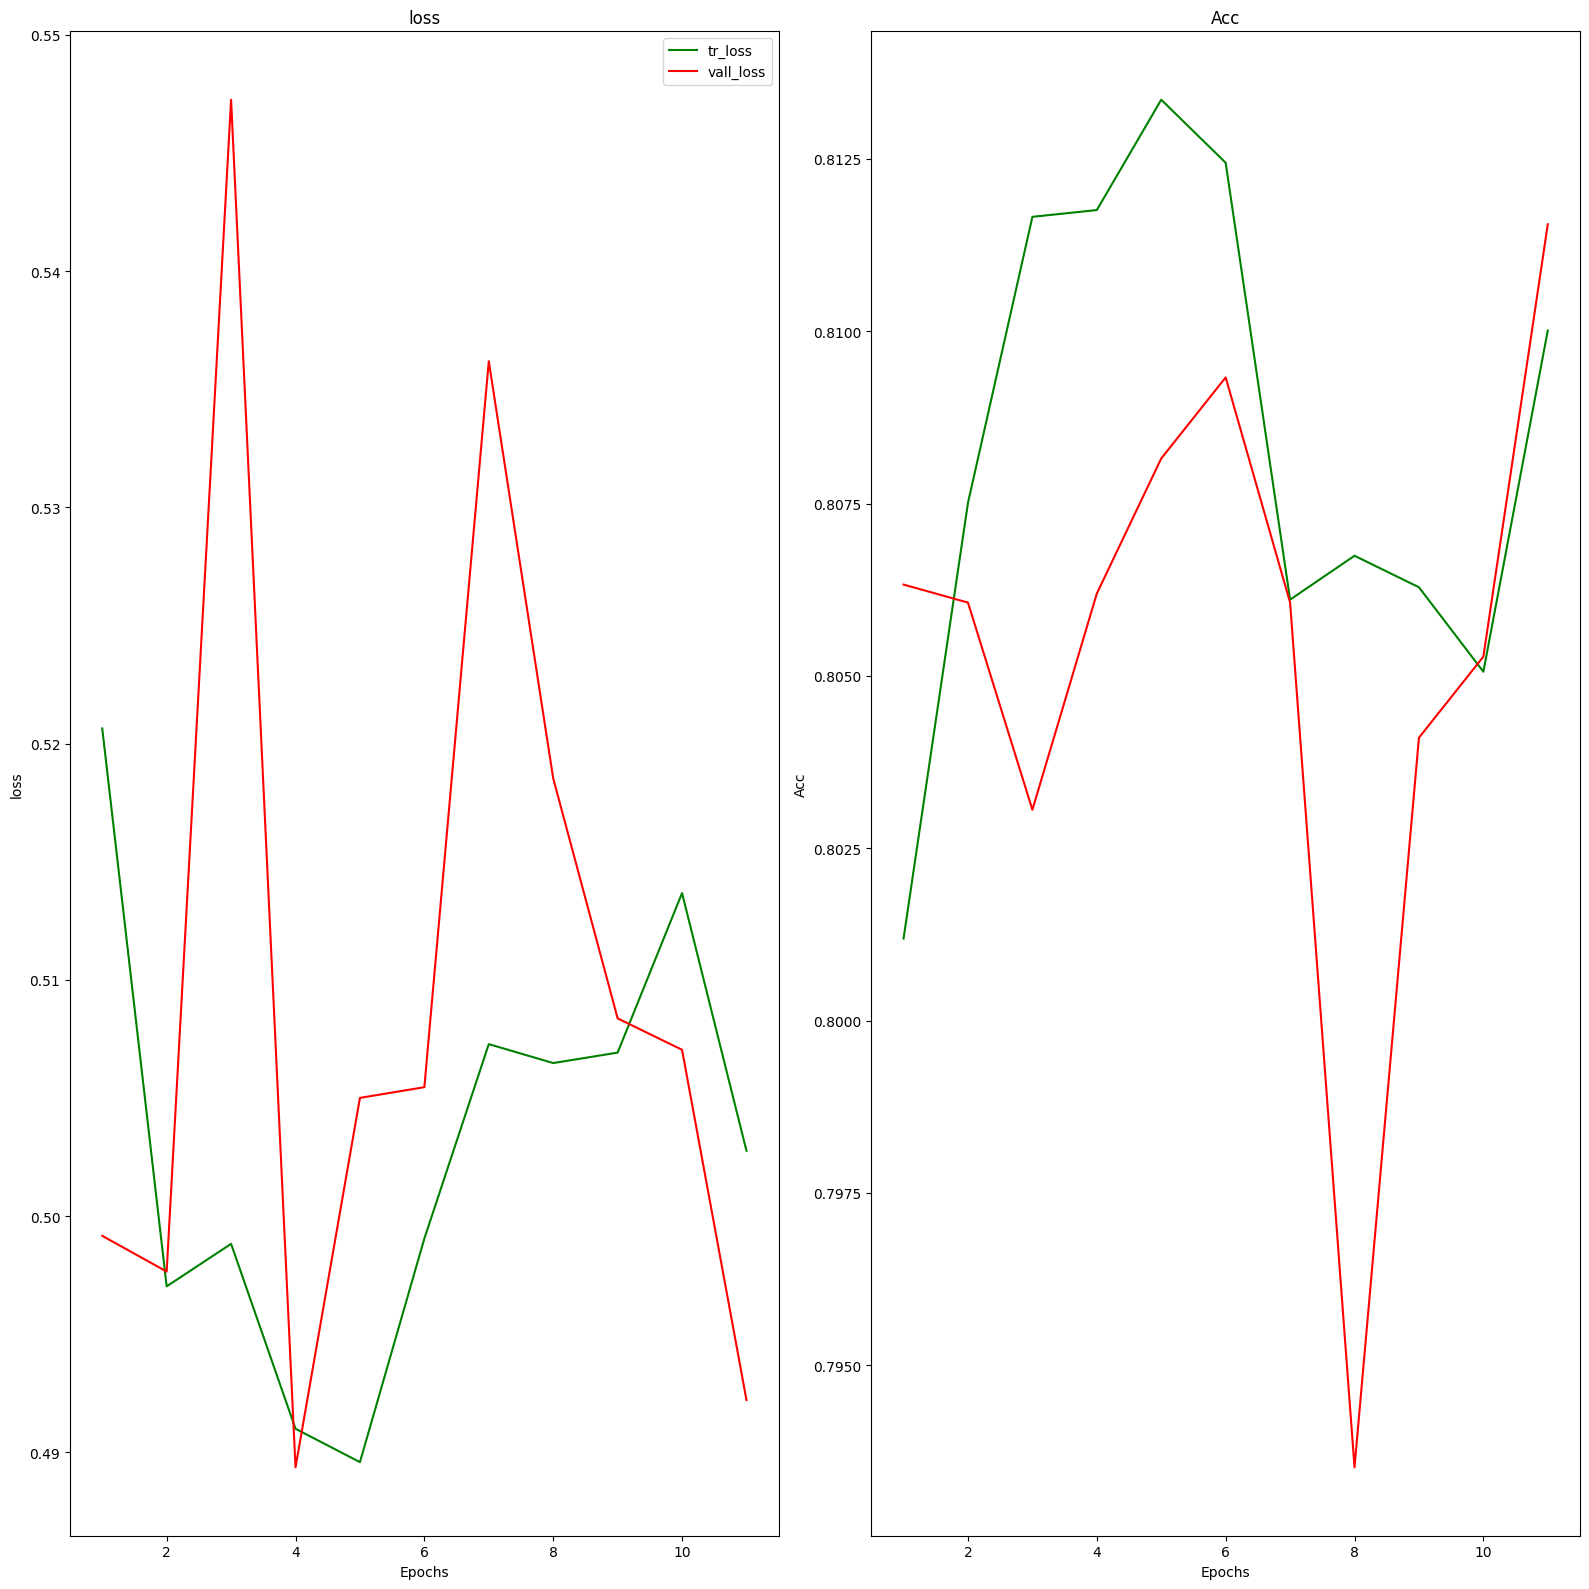

In [23]:
tr_loss=hist.history['loss']
vall_loss=hist.history['val_loss']
tr_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
epochs=[i+1 for i in range(len(tr_loss))]

plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.plot(epochs,tr_loss,color='green',label='tr_loss')
plt.plot(epochs,vall_loss,color='red',label='vall_loss')
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs,tr_acc,color='green',label='tr_acc')
plt.plot(epochs,val_acc,color='red',label='val_acc')
plt.title('Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend

plt.tight_layout()
plt.show

#### to save 

In [24]:
#model.save('model2.h5')

### To Import Model

In [25]:
from tensorflow.keras.models import load_model
model2=load_model('/kaggle/working/model.weights.keras')

In [26]:
model2.evaluate(x_valid,y_valid)

240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8008 - loss: 0.4917 - precision_1: 0.8408


[0.4893651008605957, 0.8061944842338562, 0.8431739807128906]

In [27]:
inp=Input((x_train.shape[1],))
d1=Dense(512,activation='relu')(inp)
dr=Dropout(0.1)(d1)
d2=Dense(256,activation='relu')(dr)
dr1=Dropout(0.1)(d2)
d3=Dense(128,activation='relu')(dr1)
out=Dense(3,activation="softmax")(d3)
model2=Model([inp],[out])
model2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 36)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │          18,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,555 (717.01 KB)

 Trainable params: 183,555 (717.01 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model2.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy',Precision()])

In [29]:
hist2=model2.fit(x_train,y_train,validation_data=(x_valid,y_valid),epochs=20,batch_size=32,callbacks=[modelcheckpoints,earlyStopping,logger]) 

Epoch 1/20
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7871 - loss: 0.5642 - precision_2: 0.8309 - val_accuracy: 0.8059 - val_loss: 0.5052 - val_precision_2: 0.8307
Epoch 2/20
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8055 - loss: 0.5190 - precision_2: 0.8282 - val_accuracy: 0.7953 - val_loss: 0.5031 - val_precision_2: 0.8246
Epoch 3/20
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8068 - loss: 0.5152 - precision_2: 0.8313 - val_accuracy: 0.8006 - val_loss: 0.5258 - val_precision_2: 0.8170
Epoch 4/20
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8095 - loss: 0.5098 - precision_2: 0.8329 - val_accuracy: 0.7927 - val_loss: 0.5120 - val_precision_2: 0.8099
Epoch 5/20
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8058 - loss: 0.5202 - precision_2: 0.8308 - val_accuracy: 0.8008 - val_loss: 0.5816 - val_precision_2: 0.8105
Epoch 6/20
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7982 - loss: 0.5344 - precision_2: 0.

<function matplotlib.pyplot.show(close=None, block=None)>

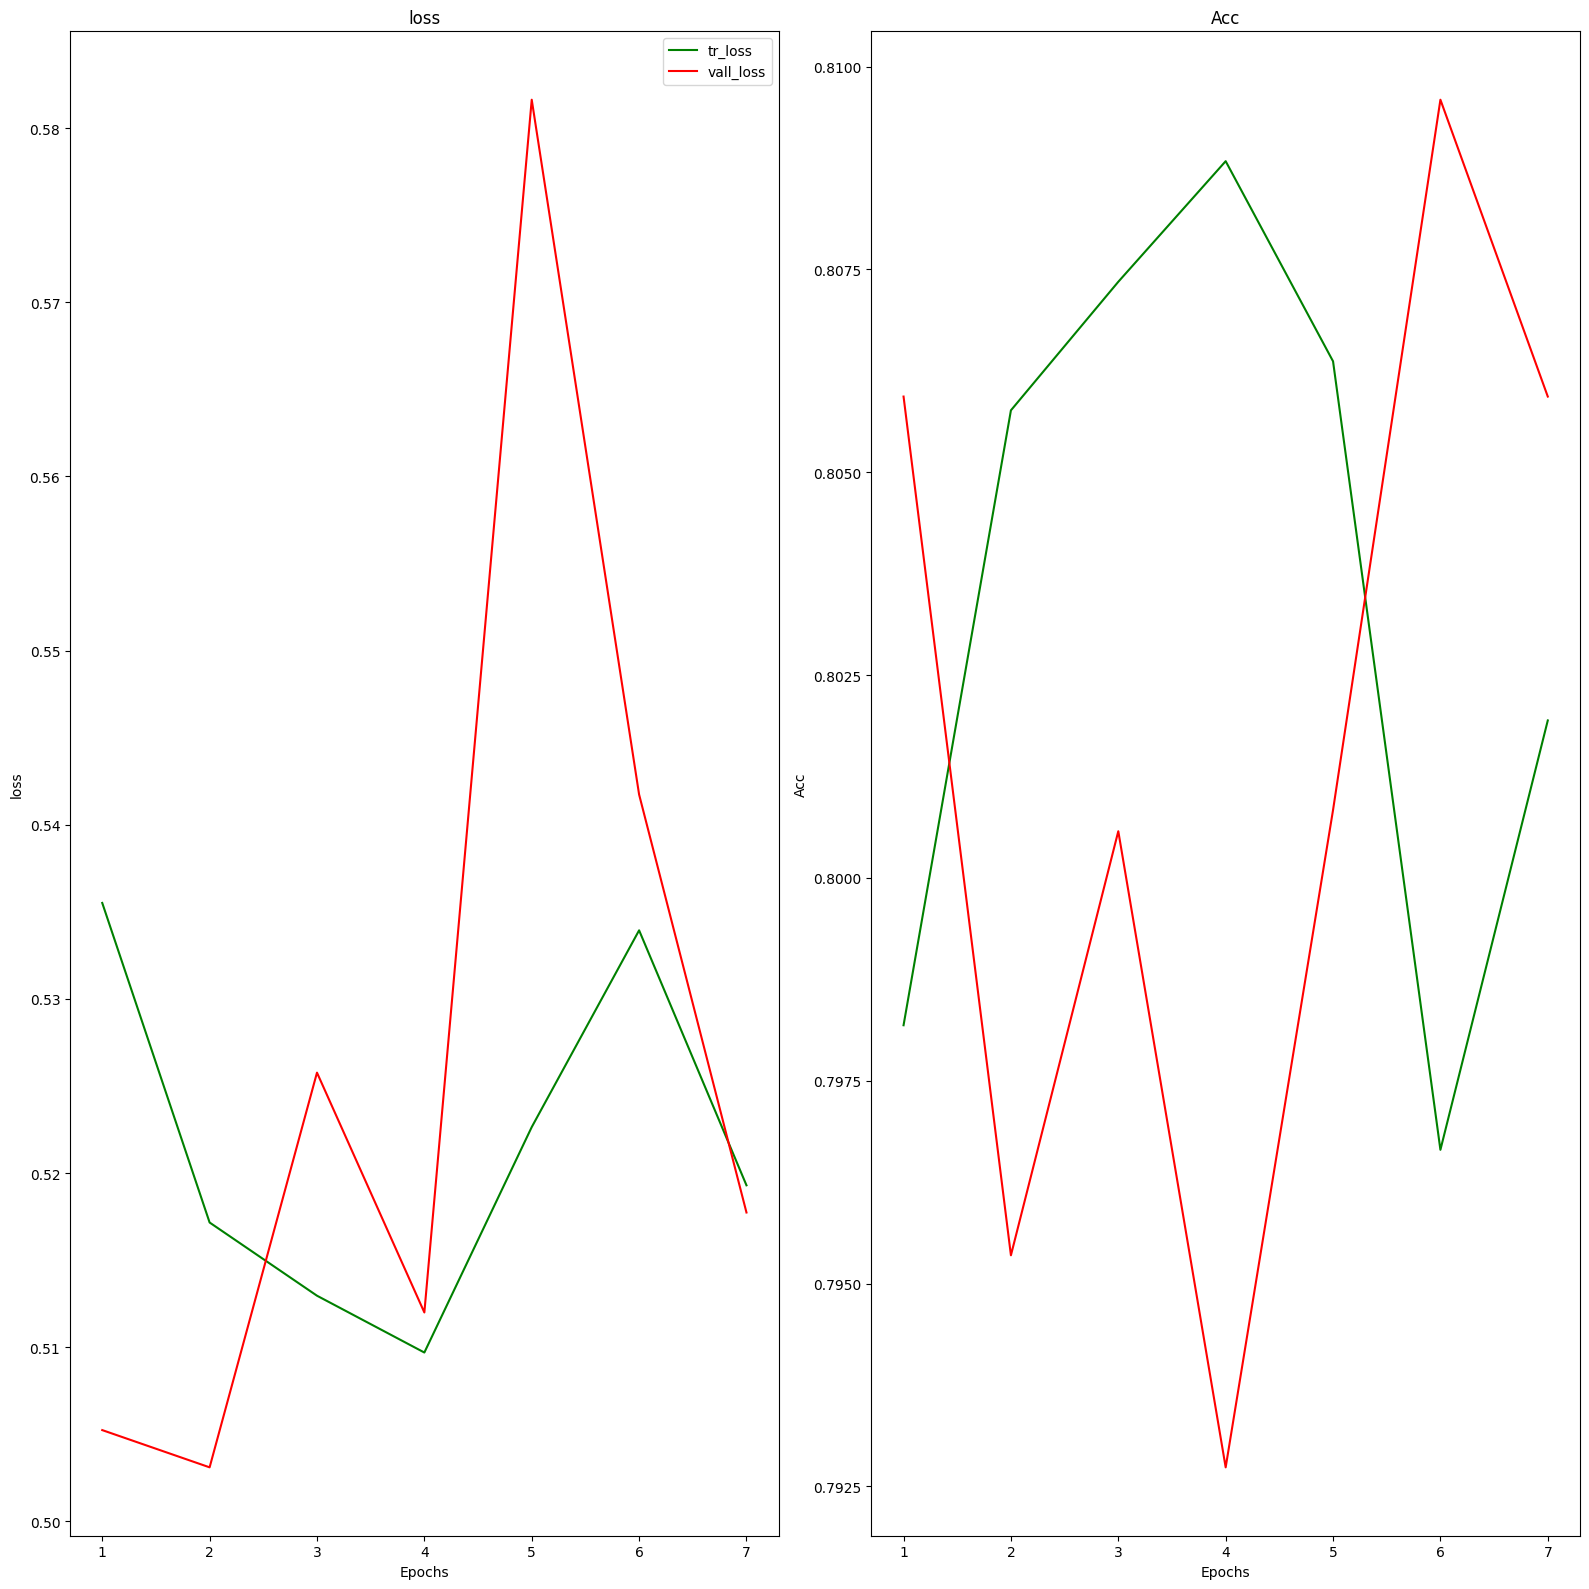

In [31]:
tr_loss=hist2.history['loss']
vall_loss=hist2.history['val_loss']
tr_acc=hist2.history['accuracy']
val_acc=hist2.history['val_accuracy']
epochs=[i+1 for i in range(len(tr_loss))]

plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.plot(epochs,tr_loss,color='green',label='tr_loss')
plt.plot(epochs,vall_loss,color='red',label='vall_loss')
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs,tr_acc,color='green',label='tr_acc')
plt.plot(epochs,val_acc,color='red',label='val_acc')
plt.title('Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend

plt.tight_layout()
plt.show

In [32]:
inp=Input((x_train.shape[1],))
d1=Dense(512,activation='relu')(inp)
BatchNormalization(),
dr=Dropout(0.2)(d1)
d2=Dense(512,activation='relu')(dr)
dr1=Dropout(0.2)(d2)
d6=Dense(512,activation='relu')(dr1)
dr2=Dropout(0.1)(d6)
d3=Dense(256,activation='relu')(dr2)
d4=Dense(128,activation='relu')(d3)
d5=Dense(64,activation='relu')(d4)
out=Dense(3,activation="softmax")(d5)
model3=Model([inp],[out])
model3.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 36)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │          18,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 716,931 (2.73 MB)

 Trainable params: 716,931 (2.73 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model3.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy',Precision()])

In [34]:
modelcheckpoints=ModelCheckpoint('model.weights.keras',monitor='val_loss',save_best_only=True,save_weights_only=False)
earlyStopping=EarlyStopping(monitor='val_loss',patience=8,restore_best_weights=True)
logger=CSVLogger('model.csv')

In [35]:
hist3=model3.fit(x_train,y_train,validation_data=(x_valid,y_valid),epochs=50,batch_size=64,callbacks=[modelcheckpoints,earlyStopping,logger]) 

Epoch 1/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.7540 - loss: 0.6099 - precision_3: 0.8232 - val_accuracy: 0.8083 - val_loss: 0.4781 - val_precision_3: 0.8298
Epoch 2/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8137 - loss: 0.4793 - precision_3: 0.8347 - val_accuracy: 0.8146 - val_loss: 0.4711 - val_precision_3: 0.8347
Epoch 3/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8210 - loss: 0.4657 - precision_3: 0.8392 - val_accuracy: 0.8161 - val_loss: 0.4657 - val_precision_3: 0.8359
Epoch 4/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8200 - loss: 0.4663 - precision_3: 0.8377 - val_accuracy: 0.8157 - val_loss: 0.4657 - val_precision_3: 0.8344
Epoch 5/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.8224 - loss: 0.4626 - precision_3: 0.8387 - val_accuracy: 0.8161 - val_loss: 0.4630 - val_precision_3: 0.8356
Epoch 6/50
957/957 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8223 - loss: 0.4611 - precision_3: 0.8396 

In [36]:
import matplotlib.pyplot as plt


<function matplotlib.pyplot.show(close=None, block=None)>

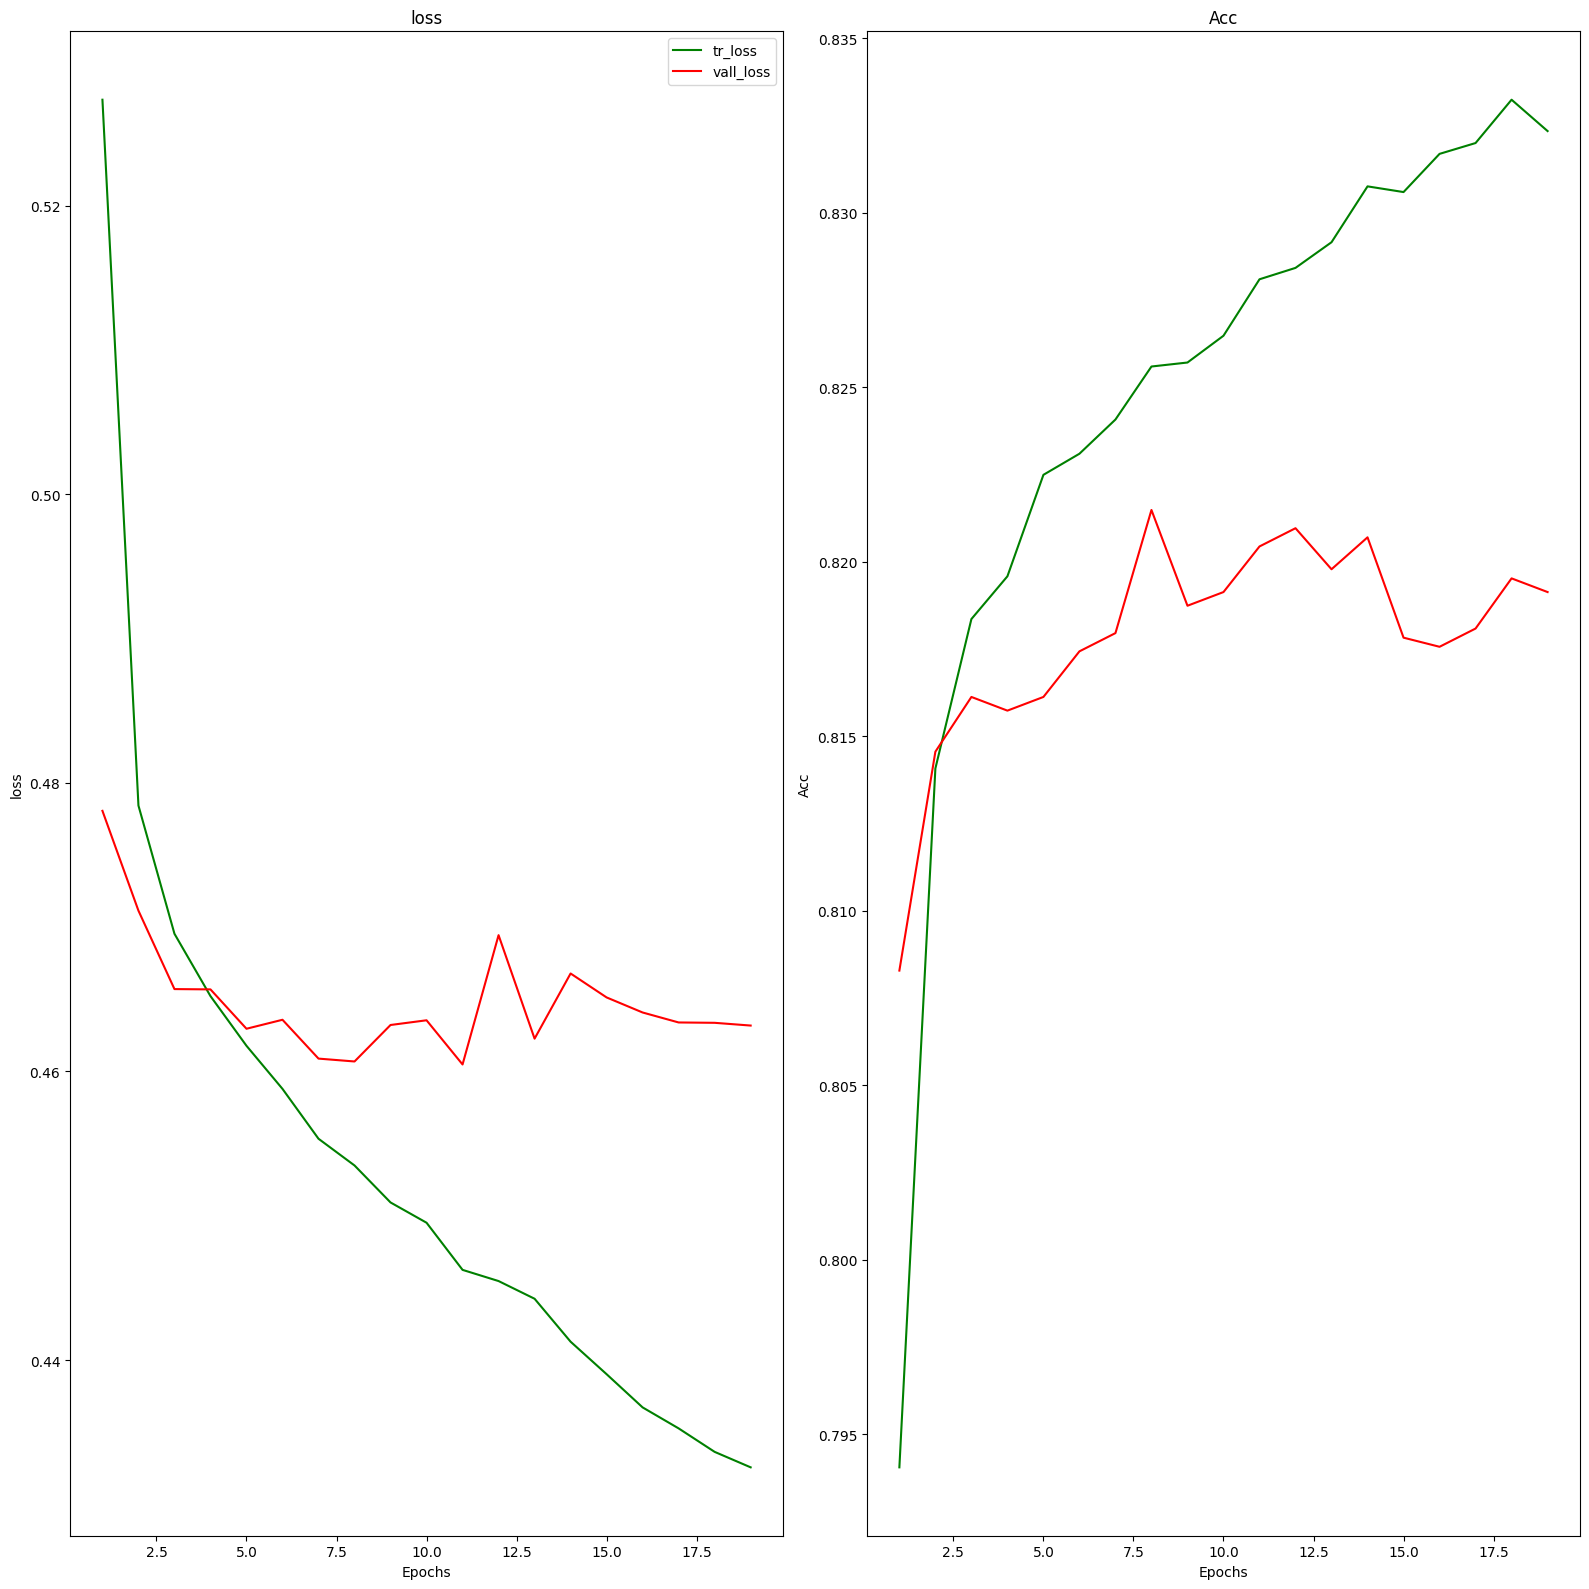

In [37]:
tr_loss=hist3.history['loss']
vall_loss=hist3.history['val_loss']
tr_acc=hist3.history['accuracy']
val_acc=hist3.history['val_accuracy']
epochs=[i+1 for i in range(len(tr_loss))]

plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.plot(epochs,tr_loss,color='green',label='tr_loss')
plt.plot(epochs,vall_loss,color='red',label='vall_loss')
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs,tr_acc,color='green',label='tr_acc')
plt.plot(epochs,val_acc,color='red',label='val_acc')
plt.title('Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend

plt.tight_layout()
plt.show

In [59]:
inp=Input((x_train.shape[1],))
d1=Dense(512,activation='relu')(inp)
BatchNormalization(),
dr=Dropout(0.3)(d1)
d2=Dense(512,activation='relu')(dr)
dr1=Dropout(0.3)(d2)
d6=Dense(512,activation='relu')(dr1)
dr2=Dropout(0.1)(d6)
d3=Dense(256,activation='relu')(dr2)
d4=Dense(128,activation='relu')(d3)
dr3=Dropout(0.1)(d4)
d5=Dense(64,activation='relu')(dr3)
out=Dense(3,activation="softmax")(d5)
model4=Model([inp],[out])
model4.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 36)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 512)                 │          18,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 716,931 (2.73 MB)

 Trainable params: 716,931 (2.73 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
modelcheckpoints=ModelCheckpoint('model.weights.keras',monitor='val_loss',save_best_only=True,save_weights_only=False)
earlyStopping=EarlyStopping(monitor='val_loss',patience=7,restore_best_weights=True)
logger=CSVLogger('model.csv')
reduce=ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=7)

In [61]:
model4.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy',Precision()])

In [62]:
hist4=model4.fit(x_train,y_train,validation_data=(x_valid,y_valid),epochs=35,batch_size=64,callbacks=[modelcheckpoints,reduce,logger]) 

Epoch 1/35
957/957 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.7891 - loss: 0.5439 - precision_8: 0.8312 - val_accuracy: 0.8127 - val_loss: 0.4736 - val_precision_8: 0.8379 - learning_rate: 0.0010
Epoch 2/35
957/957 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8161 - loss: 0.4802 - precision_8: 0.8343 - val_accuracy: 0.8134 - val_loss: 0.4755 - val_precision_8: 0.8266 - learning_rate: 0.0010
Epoch 3/35
957/957 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8202 - loss: 0.4699 - precision_8: 0.8378 - val_accuracy: 0.8161 - val_loss: 0.4751 - val_precision_8: 0.8360 - learning_rate: 0.0010
Epoch 4/35
957/957 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.8206 - loss: 0.4678 - precision_8: 0.8365 - val_accuracy: 0.8161 - val_loss: 0.4834 - val_precision_8: 0.8307 - learning_rate: 0.0010
Epoch 5/35
957/957 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8253 - loss: 0.4643 - precision_8: 0.8379 - val_accuracy: 0.8161 - val_loss: 0.4738 - val_precision_8: 0.8368 - learning_rat

<function matplotlib.pyplot.show(close=None, block=None)>

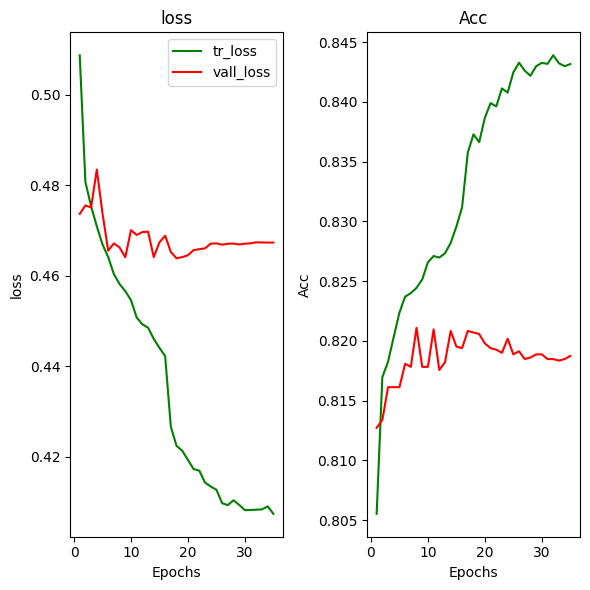

In [63]:
tr_loss=hist4.history['loss']
vall_loss=hist4.history['val_loss']
tr_acc=hist4.history['accuracy']
val_acc=hist4.history['val_accuracy']
epochs=[i+1 for i in range(len(tr_loss))]

plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.plot(epochs,tr_loss,color='green',label='tr_loss')
plt.plot(epochs,vall_loss,color='red',label='vall_loss')
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs,tr_acc,color='green',label='tr_acc')
plt.plot(epochs,val_acc,color='red',label='val_acc')
plt.title('Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend

plt.tight_layout()
plt.show

In [64]:
xx=df.drop(columns=['Target'])
yy=df['Target']

In [65]:
encoder=LabelEncoder()
yy=encoder.fit_transform(yy)

In [66]:
scaler=StandardScaler()
xx=scaler.fit_transform(xx)

In [67]:
xxtrain,xxtest,yytrain,yytest=train_test_split(xx,yy,test_size=0.2,random_state=42,stratify=y)

In [68]:
rf=RandomForestClassifier(n_estimators=100,max_depth=9)
rf.fit(xxtrain,yytrain)

RandomForestClassifier(max_depth=9)

In [69]:
print(rf.score(xxtrain,yytrain))
print(rf.score(xxtest,yytest))

0.8317705100140491
0.8169106116048092


In [70]:
xgb=XGBClassifier(n_estimators=25)
xgb.fit(xxtrain,yytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [71]:
print(xgb.score(xxtrain,yytrain))
print(xgb.score(xxtest,yytest))

0.8459176005488941
0.8263199163617355


In [72]:
lgbm=LGBMClassifier(n_estimators=150)
lgbm.fit(xxtrain,yytrain)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1397
[LightGBM] [Info] Number of data points in the train set: 61214, number of used features: 36
[LightGBM] [Info] Start training from score -1.106863
[LightGBM] [Info] Start training from score -1.633477
[LightGBM] [Info] Start training from score -0.746218


LGBMClassifier(n_estimators=150)

In [73]:
print(lgbm.score(xxtrain,yytrain))
print(lgbm.score(xxtest,yytest))

0.8613062371352959
0.8265812859383168


In [74]:
testdf=pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv')
testdf.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


In [75]:
testdfsc=scaler.transform(testdf.iloc[:,1:])


In [76]:
pesd1=lgbm.predict(testdfsc)
pesd1

array([0, 2, 2, ..., 0, 0, 0])

In [77]:
pesd1=encoder.inverse_transform(pesd1)
pesd1

array(['Dropout', 'Graduate', 'Graduate', ..., 'Dropout', 'Dropout',
       'Dropout'], dtype=object)

In [78]:
supp=pd.read_csv('/kaggle/input/playground-series-s4e6/sample_submission.csv')

In [79]:
supp.head()

,id,Target
0,76518,Graduate
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Graduate


In [80]:
supp['Target']=pesd1
supp.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Enrolled
4,76522,Enrolled


In [81]:
supp.to_csv('submission.csv',index=False)

In [82]:
pesd=model4.predict(testdfsc)
pesd

1595/1595 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


array([[9.9785864e-01, 1.7295013e-03, 4.1181574e-04],
       [6.8191537e-03, 2.0170735e-02, 9.7301006e-01],
       [3.2557443e-02, 2.4913962e-01, 7.1830297e-01],
       ...,
       [9.8643339e-01, 7.6847281e-03, 5.8818702e-03],
       [9.0668195e-01, 8.8975392e-02, 4.3426100e-03],
       [9.7719687e-01, 1.0262781e-02, 1.2540421e-02]], dtype=float32)

In [83]:
pesd=encoderr.inverse_transform(pesd)
pesd

array([['Dropout'],
       ['Graduate'],
       ['Graduate'],
       ...,
       ['Dropout'],
       ['Dropout'],
       ['Dropout']], dtype=object)

In [84]:
supp=pd.read_csv('/kaggle/input/playground-series-s4e6/sample_submission.csv')

In [85]:
supp['Target'] = pesd.ravel()
supp.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Enrolled


In [86]:
supp.to_csv('submission1.csv',index=False)